### Проект 3. Этап 1 (25 баллов)

**Описание**

Вы работаете над созданием небольшого экскурсионного тура и хотите предложить участникам посетить разнообразные достопримечательности, отдохнуть в кафе, а также принять участие в интересных активностях. Ваша задача сейчас - составить маршрут, который будет включать в себя три достопримечательности города. В дальнейшем вы будете добавлять другие элементы к туру. При желании, после выполнения проекта, изучив работу OSM, вы сможете масштабировать подобные туры и добавлять свои идеи.

Необходимо создать такой тур по Екатеринбургу.
Первый этап проекта - составить маршрут для посещения достопримечательностей Екатеринбурга. Их будет три, координаты по ним приведены ниже во "Входных данных". Ваша задача - написать программу на языке Python, которая будет определять кратчайший пешеходный маршрут, проходящий последовательно через все эти три достопримечательности.

Также вам будет необходимо самостоятельно реализовать алгоритм Дейкстры.  В ходе задачи вы познакомитесь с базовым функционалом библиотеки OpenStreetMap (OSM): получите карту города, найдете узлы в графе, научитесь обходить их, подсчитывать пройденное расстояние.

**Входные данные**

На вход поступают:
- координаты трех достопримечательностей:
    - "Башня Исеть": (56.84357, 60.59071),
    - "Здание администрации": (56.83720, 60.59766),
    - "Плотинка (Камень Любви)": (56.8377927, 60.6036443)

**Выходные данные**

Ваша программа должна вывести кратчайший пешеходный маршрут, проходящий через все три достопримечательности, а также координаты узлов (нод) графа, через которые этот маршрут проходит. Кроме того, выведите длину такого маршрута.

**Технические детали**

- Координаты на вход поступают в виде кортежей (tuple).
- Вы должны предоставить полное решение в ноутбуке Google Colab и приложить свой код.

**Оценивание**

- Без вывода - 0 баллов.
- Корректный расчет длины маршрута - 6 баллов.
- Функция самописного расчета длины маршрута - 4 балла.
- Корректный вывод координат маршрута - 15 баллов.
- Полное выполнение - 25 баллов.

Для подсчета баллов простого вывода недостаточно: необходимо предоставить обоснование и приложить код.

**Подсказки**
- Необходимо определить, в каком городе находятся заданные координаты, и выполнить поиск в OSM с использованием карты этого города.
- Допускается использование встроенного метода `ox.distance.nearest_nodes`, но алгоритм Дейкстры и подсчет расстояния необходимо реализовать самостоятельно.

**Пример ответа**

```
(45.443544, 74.44556)
(45.44554, 74.44455)
(45.45564, 74.6754)
(45.987, 74.876555)
...

Расстояние 100м.
```

В данном примере первый кортеж координат является точкой старта (первой достопримечательности), а последний кортеж - точкой финиша (последней достопримечательности).

Удачи в решении задачи!

In [ ]:
pip install osmnx

In [ ]:
import networkx as nx
import osmnx as ox

ox.__version__

'1.9.3'

**выведем графы пеших маршрутов в радиусе 750 метров от наших достопримечательностей**

(56.84357, 60.59071)


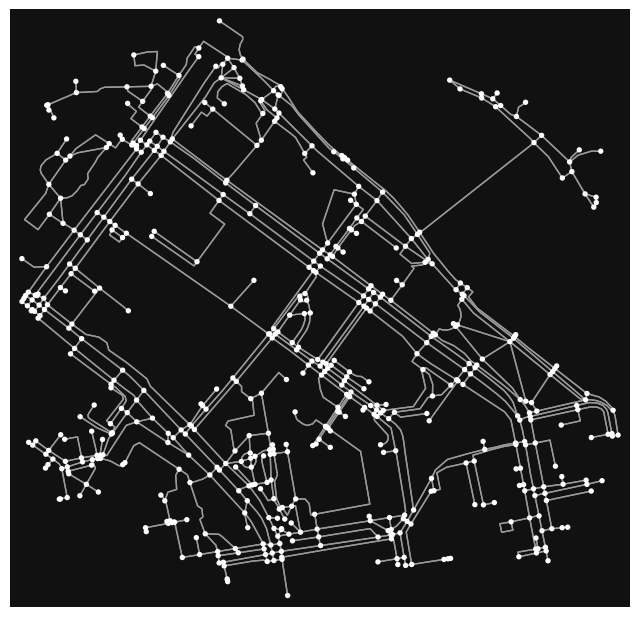

(56.8372, 60.59766)


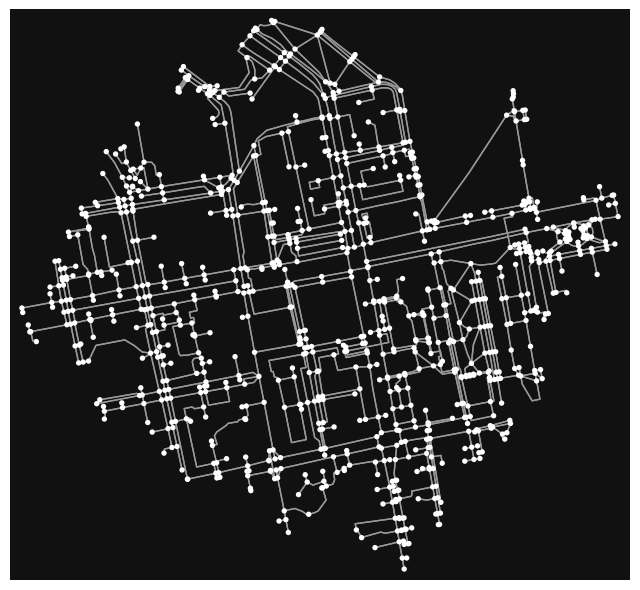

(56.8377927, 60.6036443)


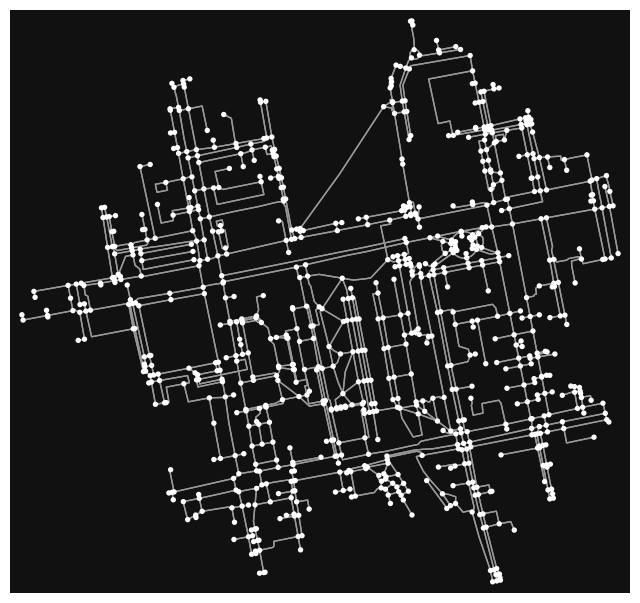

In [ ]:
attractions = {"Башня_Исеть": (56.84357, 60.59071),
               "Здание_администрации": (56.83720, 60.59766),
               "Плотинка_Камень_Любви": (56.8377927, 60.6036443)}
for attraction, coordinates in attractions.items():
    print(coordinates)
    G = ox.graph.graph_from_point(coordinates, dist=750, dist_type="network", network_type="walk")
    fig, ax = ox.plot_graph(G)

**поменяем координаты в attractions на координаты ближайших нод**

In [ ]:
origin_nodes = {}
for attraction, coordinates in attractions.items():
    G = ox.graph.graph_from_point(coordinates, dist=100, dist_type="network", network_type="walk")
    origin_node = ox.distance.nearest_nodes(G, coordinates[1], coordinates[0])
    attractions[attraction] = (G.nodes[origin_node]["y"], G.nodes[origin_node]["x"])
    print(attraction, coordinates)
    print(origin_node, attractions[attraction])
    origin_nodes[attraction] = origin_node

Башня_Исеть (56.84357, 60.59071)
5121112983 (56.8436053, 60.5912917)
Здание_администрации (56.8372, 60.59766)
783674133 (56.8373442, 60.5975434)
Плотинка_Камень_Любви (56.8377927, 60.6036443)
412069058 (56.8375431, 60.6033385)


**красная нода - наша достопримечательность на графах ниже**

(56.8436053, 60.5912917)


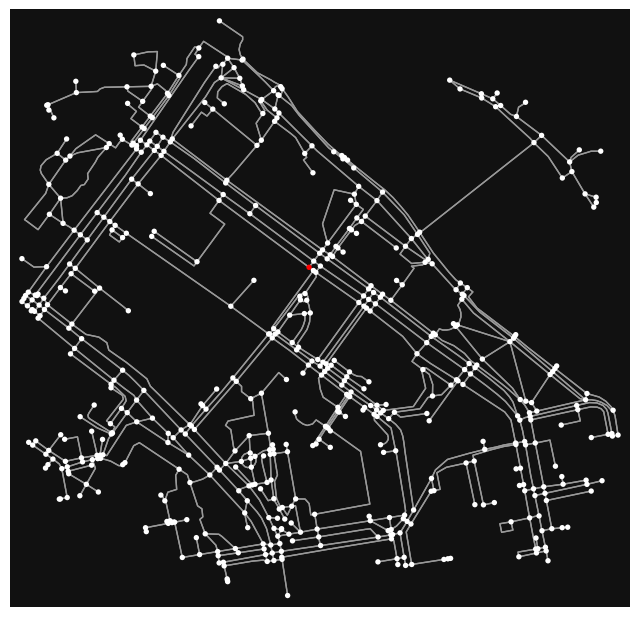

(56.8373442, 60.5975434)


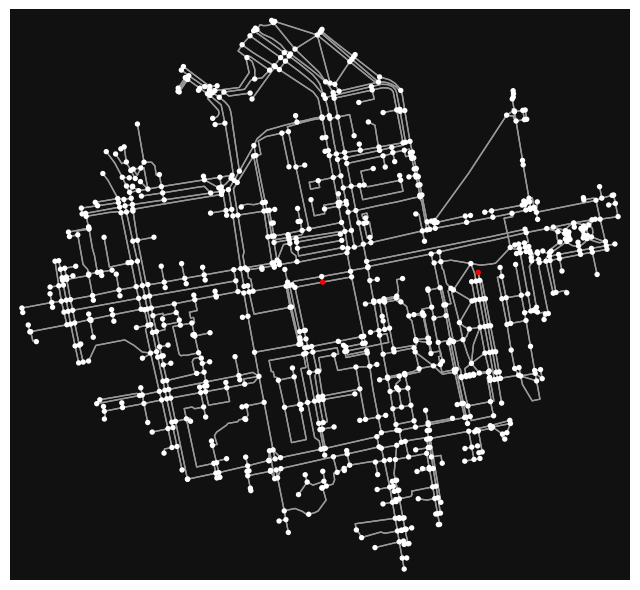

(56.8375431, 60.6033385)


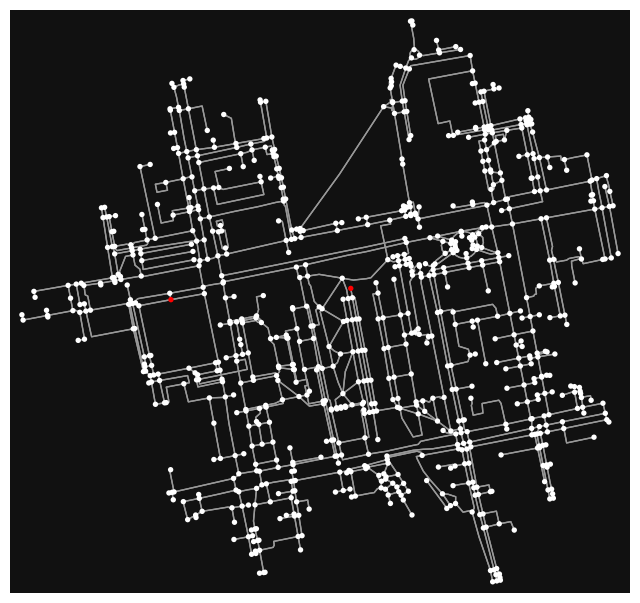

In [ ]:
for attraction, coordinates in attractions.items():
    print(coordinates)
    G = ox.graph.graph_from_point(coordinates, dist=750, dist_type="network", network_type="walk")
    nc = ["r" if node in origin_nodes.values() else "w" for node in G.nodes()]
    fig, ax = ox.plot_graph(G, node_color=nc)

**строим граф с центром в Башне, и ищем минимальный радиус, при котором у нас будут на графе все 3 достопримечательности**

In [ ]:
metka = False
radius = 750
step = 250
coordinates = attractions['Башня_Исеть']
while not metka:
    G = ox.graph.graph_from_point(coordinates, dist=radius, dist_type="network", network_type="walk")
    counter = 0
    for node in G.nodes():
        if node in origin_nodes.values():
            counter += 1
    if counter == 3:
        metka = True
    else:
        radius += step
    if radius > 10000:
        break
print(radius)

1250


**выведем их с соответсвующими им цветами**

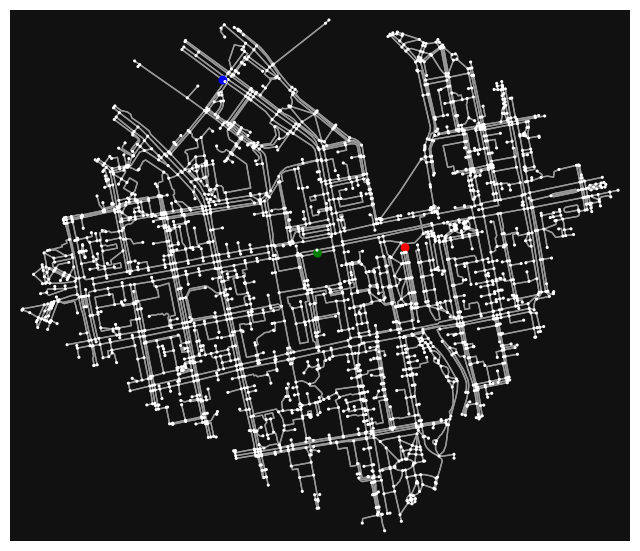

In [ ]:
origin_nodes_transponned = {}
for attraction, node in origin_nodes.items():
    origin_nodes_transponned[node] = attraction
colors = {}
colors['Башня_Исеть'] = 'b'
colors['Здание_администрации'] = 'g'
colors['Плотинка_Камень_Любви'] = 'r'
G = ox.graph.graph_from_point(attractions['Здание_администрации'], dist=radius, dist_type="network", network_type="walk")
nc = [colors[origin_nodes_transponned[node]] if node in origin_nodes.values() else "w" for node in G.nodes()]
ns = [40 if node in origin_nodes.values() else 5 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc)

**из полученного графа видно, что выгоднее начинать наш пеший маршрут из синей точки (Башня_Исеть) или из красной точки (Плотинка_Камень_Любви)**

**строим наш маршрут из синей точки в зеленую, потом из зеленой в красную**

In [ ]:
start = attractions['Башня_Исеть']
medium = attractions['Здание_администрации']
end = attractions['Плотинка_Камень_Любви']

In [ ]:
print(start)
print(medium)
print(end)

(56.8436053, 60.5912917)
(56.8373442, 60.5975434)
(56.8375431, 60.6033385)


In [ ]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)

<ipython-input-9-69d9932b3c99>:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)


In [ ]:
import pandas as pd
df_nodes = pd.DataFrame(gdf_nodes)
df_nodes.reset_index(inplace= True)
df_nodes.head()

,osmid,y,x,street_count,highway,geometry
0,175087484,56.841525,60.599665,3,NaN,POINT (60.59966 56.84153)
1,175119655,56.835761,60.580280,1,NaN,POINT (60.58028 56.83576)
2,175131769,56.836607,60.585140,1,NaN,POINT (60.58514 56.83661)
3,176141242,56.844623,60.589681,3,NaN,POINT (60.58968 56.84462)
4,176141243,56.843745,60.591837,3,NaN,POINT (60.59184 56.84375)


In [ ]:
df_edges = pd.DataFrame(gdf_edges)
df_edges.reset_index(inplace= True)
df_edges.head()

,u,v,key,osmid,highway,oneway,reversed,length,geometry,lanes,name,maxspeed,tunnel,bridge,width,service,access,junction
0,175087484,415532961,0,67290847,steps,False,True,11.810,"LINESTRING (60.59966 56.84153, 60.59962 56.84142)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,175087484,812704442,0,67290857,footway,False,False,74.500,"LINESTRING (60.59966 56.84153, 60.59870 56.84194)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,175087484,4465154578,0,1124404853,footway,False,True,59.139,"LINESTRING (60.59966 56.84153, 60.60003 56.841...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,175119655,4353503570,0,75399018,service,False,False,13.838,"LINESTRING (60.58028 56.83576, 60.58036 56.83565)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,175131769,758568972,0,433778505,residential,False,False,9.418,"LINESTRING (60.58514 56.83661, 60.58512 56.836...",2,улица Шейнкмана,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
adjacency_list = {}
for u in df_edges['u']:
    adjacency_list[str(u)] = {}
for u in df_edges['u']:
  for v in df_edges[df_edges['u'] == u]['v']:
    if len(df_edges[(df_edges['u'] == u)&(df_edges['v'] == v)]['length']) == 1:
      adjacency_list[str(u)][str(v)] = float(df_edges[(df_edges['u'] == u)&(df_edges['v'] == v)]['length'])
adjacency_list

<ipython-input-41-2425acc8fbb9>:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  adjacency_list[str(u)][str(v)] = float(df_edges[(df_edges['u'] == u)&(df_edges['v'] == v)]['length'])


{'175087484': {'415532961': 11.81,
  '812704442': 74.5,
  '4465154578': 59.138999999999996},
 '175119655': {'4353503570': 13.838},
 '175131769': {'758568972': 9.418},
 '176141242': {'999135092': 18.365,
  '1133656877': 68.738,
  '5121112981': 146.299},
 '176141243': {'756100217': 9.279, '5121112981': 17.194, '5121112978': 93.814},
 '176141244': {'1133656884': 13.251, '176141482': 13.855, '1133656916': 85.45},
 '176141249': {'474653048': 8.607,
  '1133656884': 121.243,
  '1133656959': 116.158},
 '176141482': {'176141244': 13.855,
  '1133656959': 13.477,
  '1133656852': 85.156,
  '1241659529': 23.8},
 '176144580': {'4365518258': 6.278, '1438435657': 18.166, '758061947': 81.834},
 '176180273': {'763375431': 10.144,
  '763386006': 11.21,
  '663606420': 16.604,
  '599597199': 21.866999999999997},
 '176197018': {'679117125': 24.267, '7856319245': 94.702, '176197019': 53.771},
 '176197019': {'679117126': 22.225, '986323921': 99.584, '176197018': 53.771},
 '176197023': {'694093216': 51.95,
  '

In [ ]:
osmid_coord = {}
for node in adjacency_list.keys():
    osmid_coord[str(node)] = (float(df_nodes[df_nodes['osmid'] == int(node)]['y'].iloc[0]), float(df_nodes[df_nodes['osmid'] == int(node)]['x'].iloc[0]))
osmid_coord

{'175087484': (56.8415252, 60.5996645),
 '175119655': (56.835761, 60.58028),
 '175131769': (56.8366074, 60.5851396),
 '176141242': (56.8446235, 60.5896814),
 '176141243': (56.8437451, 60.5918373),
 '176141244': (56.8420196, 60.5961141),
 '176141249': (56.8411563, 60.5975763),
 '176141482': (56.8419196, 60.5959782),
 '176144580': (56.8406791, 60.5978141),
 '176180273': (56.8420904, 60.6103712),
 '176197018': (56.8419097, 60.5856732),
 '176197019': (56.8415768, 60.5863132),
 '176197023': (56.8399222, 60.5891734),
 '176197027': (56.8388966, 60.5901824),
 '176201773': (56.836029, 60.5822111),
 '176201781': (56.8341366, 60.5829027),
 '176277604': (56.8351071, 60.6094151),
 '176277605': (56.8353411, 60.6115405),
 '179442775': (56.8357812, 60.6128723),
 '179442776': (56.8356822, 60.6120236),
 '212559728': (56.8327451, 60.6101455),
 '220500339': (56.8359391, 60.6123476),
 '220500686': (56.8359589, 60.6126379),
 '220637661': (56.8402868, 60.5838403),
 '220643320': (56.8386164, 60.5874198),
 '22

In [ ]:
import sys

class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)

    def construct_graph(self, nodes, init_graph):
        graph = {}
        for node in nodes:
            graph[node] = {}
        graph.update(init_graph)
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
        return graph

    def get_nodes(self):
        return self.nodes

    def get_outgoing_edges(self, node):
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections

    def value(self, node1, node2):
        return self.graph[node1][node2]


def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
    shortest_path = {}
    previous_nodes = {}
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    shortest_path[start_node] = 0
    while unvisited_nodes:
        current_min_node = None
        for node in unvisited_nodes:
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                previous_nodes[neighbor] = current_min_node
        unvisited_nodes.remove(current_min_node)
    return previous_nodes, shortest_path


def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
    path.append(start_node)

    print("Найден следующий лучший маршрут с длиной %.1fм:" %(shortest_path[target_node]))
    for elem in reversed(path):
        print(osmid_coord[elem])


def return_path(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
    path.append(start_node)
    path = list(reversed(path))
    res = []
    for i in range(len(path) - 1):
        pair = (int(path[i]), int(path[i + 1]))
        res.append(pair)
    for i in range(len(path) - 1):
        pair = (int(path[i+1]), int(path[i]))
        res.append(pair)
    return(res)

**Маршрут из Башни к зданию администрации**

In [ ]:
nodes = adjacency_list.keys()
graph = Graph(nodes, adjacency_list)
start_node = str(df_nodes[(df_nodes['y'] == start[0])&(df_nodes['x'] == start[1])]['osmid'].iloc[0])
target_node = str(df_nodes[(df_nodes['y'] == medium[0])&(df_nodes['x'] == medium[1])]['osmid'].iloc[0])
previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node=start_node)
print_result(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)
path1 = return_path(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)

Найден следующий лучший маршрут с длиной 946.5м:
(56.8436053, 60.5912917)
(56.843552, 60.5914231)
(56.8435227, 60.5914952)
(56.8430253, 60.5927911)
(56.8429649, 60.5929442)
(56.8429334, 60.5930228)
(56.842885, 60.5931315)
(56.8421807, 60.5945424)
(56.841752, 60.5957348)
(56.8417349, 60.595778)
(56.8416748, 60.595928)
(56.840709, 60.5975156)
(56.8406845, 60.5975242)
(56.8402942, 60.5976611)
(56.8400239, 60.5977552)
(56.8399222, 60.5977903)
(56.8394756, 60.5979378)
(56.8389619, 60.59812)
(56.8388981, 60.5981433)
(56.83856, 60.5982462)
(56.8383768, 60.5983708)
(56.8380325, 60.5984773)
(56.8379429, 60.5984494)
(56.8375629, 60.5985817)
(56.8374572, 60.5975062)
(56.8373442, 60.5975434)


**Маршрут из здания администрации к плотинке**

In [ ]:
start_node = str(df_nodes[(df_nodes['y'] == medium[0])&(df_nodes['x'] == medium[1])]['osmid'].iloc[0])
target_node = str(df_nodes[(df_nodes['y'] == end[0])&(df_nodes['x'] == end[1])]['osmid'].iloc[0])
previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node=start_node)
print_result(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)
path2 = return_path(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)

Найден следующий лучший маршрут с длиной 443.3м:
(56.8373442, 60.5975434)
(56.8374572, 60.5975062)
(56.8375629, 60.5985817)
(56.8376394, 60.5992253)
(56.8376587, 60.5992294)
(56.8379181, 60.6015859)
(56.8377346, 60.6016956)
(56.8377592, 60.6019485)
(56.8377226, 60.6030636)
(56.8373638, 60.6032557)
(56.8373785, 60.6033931)
(56.8375431, 60.6033385)


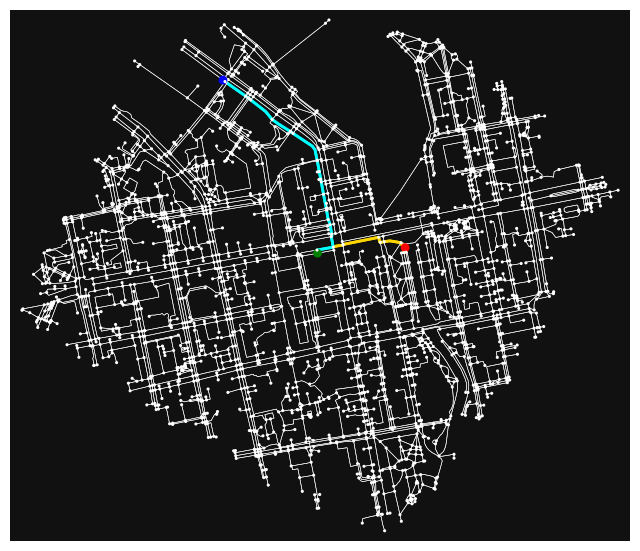

In [ ]:
G = ox.graph.graph_from_point(attractions['Здание_администрации'], dist=radius, dist_type="network", network_type="walk")
nc = [colors[origin_nodes_transponned[node]] if node in origin_nodes.values() else "w" for node in G.nodes()]
ns = [40 if node in origin_nodes.values() else 5 for node in G.nodes()]
ec = ['cyan' if edge in path1 else 'gold' if edge in path2 else 'w' for edge in G.edges()]
elw = [2 if edge in path1 else 2 if edge in path2 else 0.4 for edge in G.edges()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, edge_color=ec, edge_linewidth=elw)